**This is a feedback regarding ig Summer AI program**
Learning of TensorFlow 2.x should be encouraged because it has better arrangement of APIs as compared to TensorFlow 1.x

I've learnt the same through Datacamp courses so doing this assignment using Keras API of tensorflow 2.x,so doing with 1.x is slight difficult as well as confusing for me however if you need implementation of Neural Network (for Binary Classification) from scratch without even using tf you can check it at my github repository :
https://github.com/shivanshuman021/Shallow-NN-Classifier

 

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [3]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
sns.set()
import requests
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"
s = requests.get(url).content
Iris = pd.read_csv(io.StringIO(s.decode('utf-8')))
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
Iris.shape

(150, 5)

In [6]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
Iris = Iris[:100]
Iris.shape

(100, 5)

In [7]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
k = Iris.iloc[:,-1]
k[k=='setosa']=0
k[k=='versicolor']=1
k = np.array(k,dtype="int64")


Iris['species']=k
#Iris['s'] = k
print(Iris)


    sepal_length  sepal_width  petal_length  petal_width  species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
..           ...          ...           ...          ...      ...
95           5.7          3.0           4.2          1.2        1
96           5.7          2.9           4.2          1.3        1
97           6.2          2.9           4.3          1.3        1
98           5.1          2.5           3.0          1.1        1
99           5.7          2.8           4.1          1.3        1

[100 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
Iris=Iris[:100]
print(Iris)

    sepal_length  sepal_width  petal_length  petal_width  species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
..           ...          ...           ...          ...      ...
95           5.7          3.0           4.2          1.2        1
96           5.7          2.9           4.2          1.3        1
97           6.2          2.9           4.3          1.3        1
98           5.1          2.5           3.0          1.1        1
99           5.7          2.8           4.1          1.3        1

[100 rows x 5 columns]


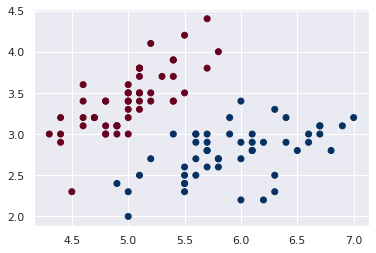

In [9]:
#visualization of given dataset
sns.set(palette='bright')
c= np.array(Iris['species'],dtype = "int64")
#sp = ['Red','']
plt.scatter(Iris['sepal_length'],Iris['sepal_width'],c = c,cmap = 'RdBu')


plt.show()

In [0]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [0]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2)

In [12]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(80, 4)
(20, 4)
(80,)
(20,)


In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(4,input_shape=(4,),activation = 'relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [0]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(train_X,train_Y,epochs = 10,batch_size=25,validation_data=(test_X,test_Y))

Epoch 1/10
4/4 [==============================] - 0s 24ms/step - loss: 0.7053 - accuracy: 0.4375 - val_loss: 0.6822 - val_accuracy: 0.6000
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6876 - accuracy: 0.4750 - val_loss: 0.6747 - val_accuracy: 0.6000
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.4875 - val_loss: 0.6706 - val_accuracy: 0.9500
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6743 - accuracy: 0.8375 - val_loss: 0.6687 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6679 - accuracy: 0.9625 - val_loss: 0.6569 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6556 - accuracy: 1.0000 - val_loss: 0.6458 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6431 - accuracy: 1.0000 - val_loss: 0.6220 - val_accuracy: 0.9500
Epoch 8/10
4/4 [=================

In [40]:
model.evaluate(test_X,test_Y)[1]

1/1 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.6000


0.6000000238418579

In [0]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

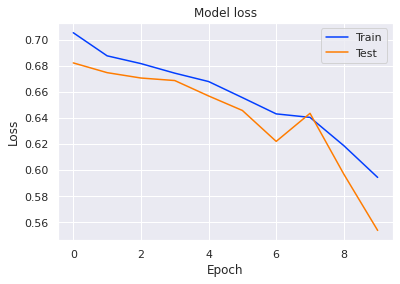

In [37]:
plot_loss(history.history['loss'], history.history['val_loss'])

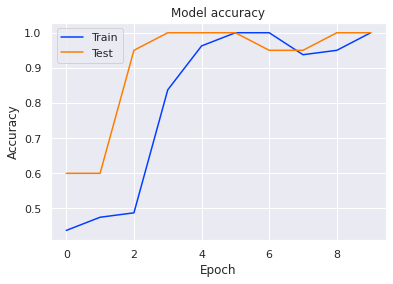

In [38]:
plot_accuracy(history.history['accuracy'],history.history['val_accuracy'])

In [34]:
print(history.history)


{'loss': [1.033373475074768, 0.7356234788894653, 0.6893113255500793, 0.6389328241348267, 0.6053802371025085], 'accuracy': [0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.9375, 0.887499988079071], 'val_loss': [0.8256736993789673, 0.7104049921035767, 0.6342854499816895, 0.5863693356513977, 0.5575051307678223], 'val_accuracy': [0.4000000059604645, 0.4000000059604645, 1.0, 1.0, 1.0]}
